In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# EDA

In [74]:
#importing training data to have a glance and maniulate it
df = pd.read_csv('train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [75]:
df.count()

enrollee_id               18359
city                      18359
city_development_index    18359
gender                    14261
relevent_experience       18359
enrolled_university       18017
education_level           17902
major_discipline          15521
experience                18300
company_size              13580
company_type              13320
last_new_job              17992
training_hours            18359
target                    18359
dtype: int64

In [76]:
#Checking the total number of null values in gender
gender_null_value_count = df.gender.isnull().sum()
gender_null_value_count

4098

In [77]:
#Percentage  of null values in gender
gender_null_value_percent = (gender_null_value_count/df.enrollee_id.count())*100
gender_null_value_percent

22.321477204640775

In [78]:
#list of all genders excluding na 
genders_list = df.gender.dropna()

In [79]:
df2 = df[df['gender'].isnull()==False]

In [80]:
df2.reset_index(inplace=True)
df2.drop(['index'], axis=1, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
df2.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0


In [82]:
gender = df2['gender']
rel_exp = df2['relevent_experience']
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


### visualizing gender against  relevent experience

In [83]:
gen_and_rel_exp = df[['gender', 'relevent_experience']]
#gen_and_rel_exp_count = pd.DataFrame(columns=['male', 'has_rel', 'has_no'])

In [84]:
gen_and_rel_exp

,gender,relevent_experience
0,Male,Has relevent experience
1,Male,Has relevent experience
2,NaN,Has relevent experience
3,Male,Has relevent experience
4,NaN,No relevent experience
...,...,...
18354,Male,Has relevent experience
18355,Male,No relevent experience
18356,Male,Has relevent experience
18357,Male,Has relevent experience


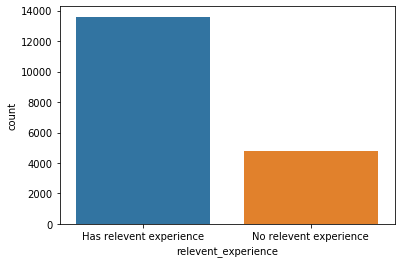

In [85]:
sns.countplot(data= gen_and_rel_exp, x='relevent_experience')

In [86]:
a = gen_and_rel_exp.groupby(['gender']).count()
a

,relevent_experience
gender,
Female,1188
Male,12884
Other,189


In [87]:
male_gen_and_rel_exp = gen_and_rel_exp[gen_and_rel_exp['gender']=='Male']
female_gen_and_rel_exp = gen_and_rel_exp[gen_and_rel_exp['gender']=='Female']
other_gen_and_rel_exp = gen_and_rel_exp[gen_and_rel_exp['gender']=='Other']

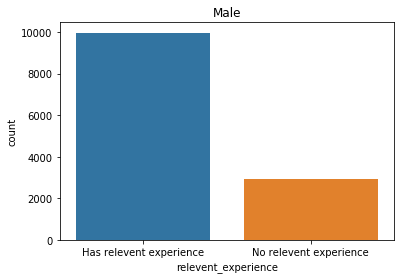

In [88]:
#male with relevant experience and no experience
sns.countplot(data = male_gen_and_rel_exp, x='relevent_experience')
plt.title('Male')
#plt.figure(figsize=(2,6))
plt.show()

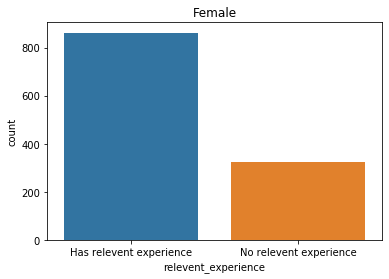

In [89]:
#female with relevant experience and no experience
sns.countplot(data = female_gen_and_rel_exp, x='relevent_experience')
plt.title('Female')
#plt.figure(figsize=(2,6))
plt.show()

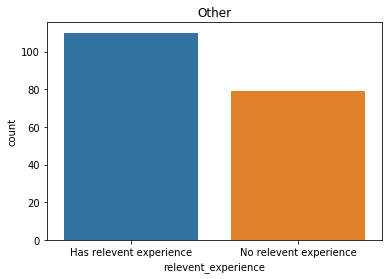

In [90]:
#other gender with relevant experience and no experience
sns.countplot(data = other_gen_and_rel_exp, x='relevent_experience')
plt.title('Other')
#plt.figure(figsize=(2,6))
plt.show()

## Comparing gender with training hours

In [91]:
gen_X_training_hrs = df2[['gender', 'training_hours']]

In [92]:
gen_X_training_hrs = gen_X_training_hrs.dropna()

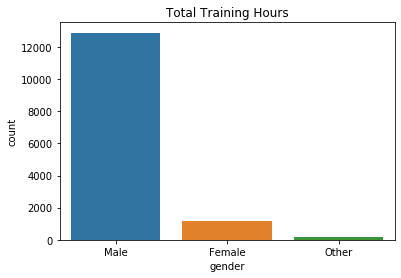

In [93]:
sns.countplot(data = gen_X_training_hrs, x = 'gender')
plt.title('Total Training Hours')
plt.show()

In [94]:
gen_X_training_hrs.describe()

,training_hours
count,14261.000000
mean,65.777435
std,60.752145
min,1.000000
25%,23.000000
50%,47.000000
75%,88.000000
max,336.000000


In [95]:
#Total numbers of each genders training hours
gen_X_training_hrs.groupby(['gender']).count()

,training_hours
gender,
Female,1188
Male,12884
Other,189


In [96]:
#Checking the gender with the min training time
gen_X_training_hrs.min()

gender            Female
training_hours         1
dtype: object

In [97]:
#Checking gender with the highest traing hour
gen_X_training_hrs.max()

gender            Other
training_hours      336
dtype: object

## Comparing gender with last new job

In [98]:
gen_X_last_new_jobs = df2[['gender', 'last_new_job']]

In [99]:
gen_X_last_new_jobs.dropna(inplace=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


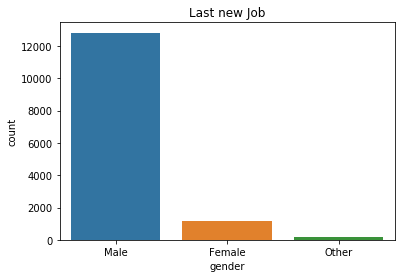

In [100]:
sns.countplot(data = gen_X_last_new_jobs, x = 'gender')
plt.title('Last new Job')
plt.show()

In [101]:
#Total numbers each genders last new job 
gen_X_last_new_jobs.groupby(['gender']).count()

,last_new_job
gender,
Female,1184
Male,12825
Other,189


In [102]:
rel_exp_X_edu_lev = df2[['relevent_experience', 'education_level']]

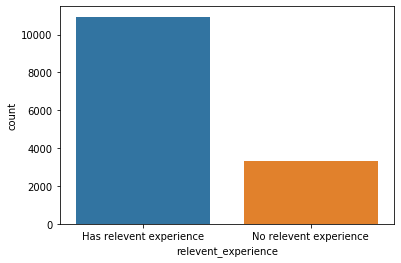

In [103]:
#relevant experience with education level
sns.countplot(data = rel_exp_X_edu_lev, x = 'relevent_experience')

In [104]:
for i in rel_exp_X_edu_lev.index:
    if rel_exp_X_edu_lev['relevent_experience'][i] == 'Has relevent experience':
        rel_exp_X_edu_lev['relevent_experience'][i] = 1
    elif rel_exp_X_edu_lev['relevent_experience'][i] == 'No relevent experience':
        rel_exp_X_edu_lev['relevent_experience'][i] = 0

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


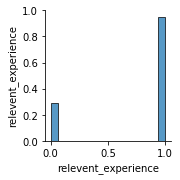

In [105]:
sns.pairplot(data = rel_exp_X_edu_lev)

In [106]:
#dataframe for first test/experiment of model
df_experiment = df2[['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'target']].dropna()

In [107]:
df_experiment.describe()

,target
count,12115.000000
mean,0.126537
std,0.332468
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [108]:
from sklearn.preprocessing import LabelBinarizer, label_binarize

In [109]:
for i in df_experiment['relevent_experience'].index:
    if df_experiment['relevent_experience'][i] == 'Has relevent experience':
        df_experiment['relevent_experience'][i] = 1
    if df_experiment['relevent_experience'][i] == 'No relevent experience':
        df_experiment['relevent_experience'][i] = 0   

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [110]:
df_experiment['enrolled_university'].value_counts()

no_enrollment       9818
Full time course    1561
Part time course     736
Name: enrolled_university, dtype: int64

In [111]:
for i in df_experiment['enrolled_university'].index:
    if df_experiment['enrolled_university'][i] == 'no_enrollment':
        df_experiment['enrolled_university'][i] = 0
    if df_experiment['enrolled_university'][i] == 'Full time course':
        df_experiment['enrolled_university'][i] = 1
    if df_experiment['enrolled_university'][i] == 'Part time course':
        df_experiment['enrolled_university'][i] = 2

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [112]:
df_experiment['education_level'].value_counts()

Graduate    8445
Masters     3308
Phd          362
Name: education_level, dtype: int64

In [113]:
for i in df_experiment['education_level'].index:
    if df_experiment['education_level'][i] == 'Graduate':
        df_experiment['education_level'][i] = 0
    if df_experiment['education_level'][i] == 'Masters':
        df_experiment['education_level'][i] = 1
    if df_experiment['education_level'][i] == 'Phd':
        df_experiment['education_level'][i] = 2

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [114]:
df_experiment['major_discipline'].value_counts()

STEM               10688
Humanities           564
Other                267
Business Degree      239
Arts                 189
No Major             168
Name: major_discipline, dtype: int64

In [115]:
for i in df_experiment['major_discipline'].index:
    if df_experiment['major_discipline'][i] == 'STEM':
        df_experiment['major_discipline'][i] = 0
    if df_experiment['major_discipline'][i] == 'Humanities':
        df_experiment['major_discipline'][i] = 1
    if df_experiment['major_discipline'][i] == 'Other':
        df_experiment['major_discipline'][i] = 2
    if df_experiment['major_discipline'][i] == 'Business Degree':
        df_experiment['major_discipline'][i] = 3
    if df_experiment['major_discipline'][i] == 'Arts':
        df_experiment['major_discipline'][i] = 4
    if df_experiment['major_discipline'][i] == 'No Major':
        df_experiment['major_discipline'][i] = 5

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Anaconda\lib\site-packages\i

In [116]:
df_experiment['experience'].value_counts()

>20    2754
5       763
10      705
6       683
9       680
4       665
7       638
3       569
15      519
11      497
8       481
14      438
2       437
16      424
12      365
13      310
17      277
19      232
18      230
1       185
<1      151
20      112
Name: experience, dtype: int64

In [117]:
df_experiment

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,target
0,Male,1,0,0,0,3,0
1,Male,1,0,0,0,14,0
2,Male,1,0,0,0,14,0
3,Female,1,0,0,2,8,0
4,Male,1,0,0,0,6,1
...,...,...,...,...,...,...,...
14256,Male,1,1,0,0,5,0
14257,Male,0,0,0,1,15,0
14258,Male,1,0,1,0,11,0
14259,Male,1,0,0,0,>20,0


In [118]:
for i in df_experiment['experience'].index:
    if df_experiment['experience'][i] == '>20':
        df_experiment['experience'][i] = '20'
    if df_experiment['experience'][i] == '<1':
        df_experiment['experience'][i] = '0'

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [119]:
for i in df_experiment['experience'].index:
    df_experiment['experience'][i] = int(df_experiment['experience'][i])
    print(f'done {i}')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 14
done 15
done 16
done 17
done 18
done 19
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 38
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 57
done 58
done 59
done 60
done 61
done 63
done 64
done 65
done 67
done 68
done 69
done 70
done 72
done 73
done 74
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 88
done 90
done 91
done 93
done 94
done 95
done 96
done 98
done 99
done 101
done 102
done 103
done 104
done 105
done 106
done 107
done 108
done 109
done 110
done 111
done 112
done 113
done 114
done 115
done 116
done 117
done 118
done 119
done 120
done 121
done 122
done 123
done 124
done 125
done 126
done 127
done 128
done 129
done 130
done 131
done 132
done 133
done 134
done 135
done 136
done 137
done 140
done

done 1230
done 1231
done 1232
done 1233
done 1234
done 1235
done 1236
done 1237
done 1238
done 1239
done 1240
done 1241
done 1242
done 1243
done 1245
done 1246
done 1247
done 1248
done 1250
done 1252
done 1253
done 1254
done 1255
done 1256
done 1257
done 1258
done 1259
done 1261
done 1263
done 1264
done 1266
done 1267
done 1268
done 1269
done 1270
done 1271
done 1272
done 1273
done 1275
done 1276
done 1277
done 1278
done 1279
done 1280
done 1281
done 1282
done 1283
done 1284
done 1285
done 1286
done 1287
done 1288
done 1289
done 1290
done 1291
done 1292
done 1293
done 1294
done 1295
done 1296
done 1297
done 1298
done 1299
done 1300
done 1301
done 1302
done 1303
done 1304
done 1305
done 1307
done 1308
done 1309
done 1310
done 1312
done 1314
done 1316
done 1317
done 1318
done 1319
done 1320
done 1321
done 1322
done 1323
done 1325
done 1327
done 1328
done 1329
done 1330
done 1331
done 1333
done 1334
done 1335
done 1336
done 1337
done 1338
done 1339
done 1340
done 1341
done 1342
done 1343


done 2246
done 2247
done 2248
done 2249
done 2252
done 2253
done 2254
done 2255
done 2256
done 2258
done 2260
done 2261
done 2262
done 2263
done 2264
done 2265
done 2266
done 2267
done 2269
done 2271
done 2273
done 2274
done 2275
done 2276
done 2277
done 2278
done 2279
done 2280
done 2281
done 2283
done 2284
done 2285
done 2287
done 2288
done 2289
done 2290
done 2291
done 2292
done 2293
done 2294
done 2295
done 2296
done 2297
done 2298
done 2299
done 2300
done 2301
done 2302
done 2303
done 2304
done 2305
done 2306
done 2307
done 2308
done 2309
done 2310
done 2311
done 2312
done 2313
done 2314
done 2315
done 2316
done 2317
done 2318
done 2319
done 2320
done 2321
done 2322
done 2323
done 2324
done 2325
done 2326
done 2327
done 2328
done 2329
done 2330
done 2331
done 2333
done 2334
done 2335
done 2336
done 2337
done 2339
done 2340
done 2341
done 2342
done 2343
done 2345
done 2346
done 2347
done 2348
done 2349
done 2350
done 2351
done 2352
done 2354
done 2355
done 2356
done 2357
done 2359


done 3240
done 3242
done 3243
done 3244
done 3245
done 3246
done 3247
done 3248
done 3249
done 3250
done 3251
done 3252
done 3253
done 3254
done 3255
done 3256
done 3257
done 3258
done 3259
done 3260
done 3261
done 3262
done 3263
done 3264
done 3265
done 3266
done 3268
done 3269
done 3270
done 3271
done 3272
done 3273
done 3275
done 3276
done 3277
done 3278
done 3279
done 3280
done 3282
done 3283
done 3284
done 3285
done 3286
done 3287
done 3288
done 3290
done 3292
done 3294
done 3295
done 3296
done 3297
done 3298
done 3299
done 3300
done 3301
done 3302
done 3303
done 3304
done 3306
done 3307
done 3308
done 3311
done 3312
done 3313
done 3315
done 3316
done 3317
done 3318
done 3319
done 3320
done 3321
done 3323
done 3325
done 3326
done 3327
done 3328
done 3329
done 3330
done 3331
done 3332
done 3333
done 3334
done 3335
done 3336
done 3337
done 3338
done 3339
done 3340
done 3341
done 3342
done 3344
done 3345
done 3346
done 3347
done 3348
done 3349
done 3350
done 3351
done 3352
done 3353


done 4194
done 4195
done 4196
done 4197
done 4198
done 4199
done 4200
done 4201
done 4202
done 4204
done 4206
done 4207
done 4208
done 4210
done 4211
done 4212
done 4213
done 4214
done 4215
done 4216
done 4217
done 4218
done 4219
done 4220
done 4221
done 4222
done 4223
done 4224
done 4226
done 4227
done 4229
done 4230
done 4231
done 4232
done 4233
done 4234
done 4235
done 4236
done 4237
done 4238
done 4239
done 4241
done 4242
done 4243
done 4246
done 4247
done 4248
done 4249
done 4250
done 4251
done 4252
done 4253
done 4254
done 4255
done 4256
done 4257
done 4259
done 4260
done 4261
done 4262
done 4263
done 4265
done 4266
done 4267
done 4268
done 4269
done 4270
done 4271
done 4272
done 4273
done 4274
done 4275
done 4276
done 4277
done 4278
done 4279
done 4280
done 4281
done 4282
done 4284
done 4285
done 4286
done 4287
done 4288
done 4289
done 4292
done 4293
done 4294
done 4295
done 4296
done 4297
done 4299
done 4300
done 4301
done 4302
done 4304
done 4305
done 4306
done 4307
done 4308


done 5189
done 5190
done 5191
done 5192
done 5193
done 5194
done 5195
done 5196
done 5197
done 5198
done 5199
done 5200
done 5201
done 5202
done 5203
done 5204
done 5205
done 5206
done 5207
done 5208
done 5209
done 5210
done 5211
done 5212
done 5213
done 5214
done 5215
done 5216
done 5217
done 5218
done 5219
done 5220
done 5221
done 5223
done 5224
done 5225
done 5226
done 5227
done 5228
done 5229
done 5230
done 5231
done 5232
done 5233
done 5235
done 5236
done 5238
done 5239
done 5240
done 5241
done 5242
done 5243
done 5245
done 5246
done 5247
done 5249
done 5250
done 5251
done 5252
done 5253
done 5254
done 5255
done 5256
done 5257
done 5258
done 5259
done 5260
done 5262
done 5263
done 5264
done 5265
done 5266
done 5267
done 5268
done 5269
done 5270
done 5271
done 5272
done 5273
done 5274
done 5276
done 5277
done 5278
done 5279
done 5280
done 5281
done 5282
done 5283
done 5284
done 5285
done 5286
done 5287
done 5288
done 5289
done 5290
done 5291
done 5292
done 5293
done 5294
done 5295


done 6163
done 6164
done 6165
done 6166
done 6168
done 6169
done 6171
done 6172
done 6173
done 6176
done 6177
done 6178
done 6179
done 6180
done 6182
done 6183
done 6184
done 6185
done 6186
done 6187
done 6188
done 6189
done 6190
done 6191
done 6192
done 6193
done 6194
done 6196
done 6197
done 6199
done 6201
done 6202
done 6203
done 6204
done 6205
done 6206
done 6207
done 6208
done 6209
done 6210
done 6211
done 6212
done 6213
done 6216
done 6217
done 6218
done 6219
done 6220
done 6222
done 6223
done 6224
done 6225
done 6226
done 6227
done 6229
done 6230
done 6231
done 6232
done 6233
done 6234
done 6235
done 6236
done 6237
done 6239
done 6240
done 6242
done 6243
done 6244
done 6246
done 6247
done 6249
done 6250
done 6251
done 6252
done 6253
done 6254
done 6259
done 6260
done 6261
done 6262
done 6263
done 6264
done 6265
done 6267
done 6268
done 6270
done 6271
done 6272
done 6273
done 6274
done 6276
done 6277
done 6278
done 6279
done 6280
done 6282
done 6283
done 6284
done 6285
done 6286


done 7188
done 7189
done 7191
done 7193
done 7194
done 7195
done 7196
done 7197
done 7198
done 7199
done 7200
done 7201
done 7202
done 7203
done 7204
done 7205
done 7206
done 7207
done 7208
done 7210
done 7211
done 7212
done 7213
done 7214
done 7215
done 7216
done 7217
done 7218
done 7219
done 7220
done 7221
done 7222
done 7223
done 7224
done 7225
done 7226
done 7227
done 7228
done 7229
done 7230
done 7231
done 7232
done 7233
done 7234
done 7237
done 7238
done 7239
done 7240
done 7241
done 7242
done 7243
done 7244
done 7245
done 7246
done 7247
done 7248
done 7250
done 7251
done 7252
done 7254
done 7255
done 7256
done 7258
done 7259
done 7261
done 7262
done 7263
done 7264
done 7265
done 7266
done 7267
done 7268
done 7269
done 7270
done 7271
done 7272
done 7274
done 7275
done 7276
done 7278
done 7279
done 7280
done 7281
done 7283
done 7285
done 7286
done 7287
done 7288
done 7289
done 7290
done 7291
done 7292
done 7293
done 7296
done 7297
done 7298
done 7299
done 7302
done 7303
done 7304


done 8178
done 8179
done 8180
done 8181
done 8183
done 8185
done 8186
done 8187
done 8188
done 8189
done 8190
done 8192
done 8194
done 8195
done 8196
done 8197
done 8198
done 8199
done 8202
done 8203
done 8204
done 8208
done 8209
done 8210
done 8212
done 8213
done 8214
done 8215
done 8216
done 8217
done 8218
done 8219
done 8220
done 8221
done 8222
done 8223
done 8224
done 8225
done 8226
done 8227
done 8228
done 8229
done 8230
done 8231
done 8232
done 8233
done 8234
done 8235
done 8237
done 8238
done 8239
done 8240
done 8241
done 8242
done 8244
done 8245
done 8246
done 8248
done 8249
done 8251
done 8252
done 8253
done 8254
done 8255
done 8256
done 8257
done 8258
done 8259
done 8260
done 8261
done 8262
done 8263
done 8264
done 8265
done 8266
done 8267
done 8268
done 8269
done 8270
done 8271
done 8272
done 8273
done 8274
done 8275
done 8276
done 8277
done 8278
done 8279
done 8280
done 8281
done 8282
done 8283
done 8285
done 8286
done 8288
done 8289
done 8290
done 8291
done 8292
done 8293


done 9221
done 9222
done 9223
done 9224
done 9225
done 9226
done 9228
done 9229
done 9230
done 9231
done 9232
done 9233
done 9234
done 9235
done 9236
done 9237
done 9239
done 9241
done 9242
done 9243
done 9244
done 9246
done 9248
done 9250
done 9252
done 9253
done 9254
done 9256
done 9257
done 9258
done 9260
done 9262
done 9263
done 9264
done 9265
done 9266
done 9267
done 9269
done 9270
done 9271
done 9272
done 9273
done 9274
done 9275
done 9276
done 9277
done 9278
done 9279
done 9280
done 9281
done 9282
done 9283
done 9284
done 9285
done 9286
done 9287
done 9289
done 9290
done 9292
done 9293
done 9294
done 9295
done 9296
done 9298
done 9299
done 9300
done 9301
done 9302
done 9303
done 9305
done 9306
done 9307
done 9308
done 9309
done 9311
done 9312
done 9313
done 9314
done 9315
done 9318
done 9319
done 9320
done 9321
done 9322
done 9323
done 9324
done 9325
done 9326
done 9328
done 9330
done 9332
done 9333
done 9334
done 9335
done 9336
done 9338
done 9340
done 9341
done 9342
done 9344


done 10212
done 10213
done 10214
done 10215
done 10216
done 10217
done 10221
done 10223
done 10224
done 10225
done 10226
done 10228
done 10229
done 10230
done 10231
done 10232
done 10234
done 10236
done 10237
done 10238
done 10240
done 10242
done 10243
done 10244
done 10245
done 10246
done 10248
done 10251
done 10252
done 10253
done 10254
done 10255
done 10256
done 10257
done 10258
done 10260
done 10261
done 10262
done 10264
done 10265
done 10266
done 10267
done 10269
done 10270
done 10271
done 10272
done 10273
done 10275
done 10276
done 10277
done 10278
done 10279
done 10280
done 10281
done 10282
done 10283
done 10284
done 10285
done 10286
done 10287
done 10288
done 10289
done 10291
done 10293
done 10295
done 10297
done 10298
done 10299
done 10300
done 10301
done 10303
done 10304
done 10305
done 10307
done 10308
done 10309
done 10310
done 10311
done 10312
done 10313
done 10315
done 10317
done 10318
done 10319
done 10320
done 10321
done 10322
done 10323
done 10324
done 10325
done 10326

done 11254
done 11256
done 11257
done 11259
done 11261
done 11262
done 11263
done 11264
done 11265
done 11266
done 11268
done 11269
done 11270
done 11271
done 11272
done 11273
done 11274
done 11275
done 11276
done 11277
done 11278
done 11279
done 11280
done 11281
done 11284
done 11285
done 11286
done 11287
done 11288
done 11290
done 11291
done 11292
done 11293
done 11295
done 11296
done 11298
done 11299
done 11300
done 11301
done 11302
done 11303
done 11304
done 11305
done 11307
done 11309
done 11310
done 11311
done 11313
done 11315
done 11316
done 11317
done 11320
done 11321
done 11322
done 11323
done 11325
done 11326
done 11327
done 11328
done 11329
done 11330
done 11331
done 11332
done 11333
done 11334
done 11336
done 11337
done 11338
done 11339
done 11340
done 11342
done 11343
done 11344
done 11345
done 11346
done 11347
done 11348
done 11349
done 11350
done 11351
done 11352
done 11354
done 11357
done 11358
done 11359
done 11360
done 11362
done 11363
done 11365
done 11366
done 11367

done 12286
done 12287
done 12288
done 12289
done 12290
done 12291
done 12292
done 12293
done 12294
done 12295
done 12296
done 12297
done 12298
done 12299
done 12300
done 12301
done 12302
done 12303
done 12305
done 12306
done 12307
done 12308
done 12309
done 12310
done 12311
done 12312
done 12313
done 12315
done 12316
done 12317
done 12318
done 12320
done 12321
done 12322
done 12323
done 12325
done 12326
done 12327
done 12328
done 12329
done 12330
done 12331
done 12332
done 12333
done 12334
done 12335
done 12337
done 12338
done 12339
done 12340
done 12341
done 12342
done 12343
done 12344
done 12345
done 12346
done 12347
done 12348
done 12349
done 12350
done 12351
done 12352
done 12353
done 12354
done 12355
done 12356
done 12357
done 12358
done 12359
done 12360
done 12361
done 12362
done 12363
done 12364
done 12365
done 12366
done 12368
done 12370
done 12371
done 12372
done 12373
done 12374
done 12375
done 12377
done 12378
done 12379
done 12380
done 12381
done 12382
done 12383
done 12384

done 13316
done 13318
done 13319
done 13320
done 13322
done 13323
done 13324
done 13325
done 13327
done 13328
done 13329
done 13330
done 13331
done 13332
done 13333
done 13334
done 13335
done 13337
done 13339
done 13341
done 13342
done 13343
done 13344
done 13345
done 13346
done 13347
done 13348
done 13350
done 13352
done 13353
done 13354
done 13355
done 13356
done 13358
done 13359
done 13361
done 13363
done 13365
done 13366
done 13367
done 13369
done 13370
done 13371
done 13372
done 13373
done 13376
done 13378
done 13380
done 13383
done 13384
done 13385
done 13386
done 13388
done 13389
done 13390
done 13391
done 13392
done 13393
done 13394
done 13395
done 13396
done 13397
done 13398
done 13400
done 13401
done 13402
done 13403
done 13404
done 13405
done 13407
done 13408
done 13409
done 13410
done 13411
done 13412
done 13413
done 13414
done 13416
done 13418
done 13419
done 13420
done 13421
done 13422
done 13423
done 13424
done 13426
done 13427
done 13428
done 13429
done 13430
done 13431

In [120]:
df_experiment.corr

<bound method DataFrame.corr of        gender relevent_experience enrolled_university education_level  \
0        Male                   1                   0               0   
1        Male                   1                   0               0   
2        Male                   1                   0               0   
3      Female                   1                   0               0   
4        Male                   1                   0               0   
...       ...                 ...                 ...             ...   
14256    Male                   1                   1               0   
14257    Male                   0                   0               0   
14258    Male                   1                   0               1   
14259    Male                   1                   0               0   
14260  Female                   1                   0               0   

      major_discipline experience  target  
0                    0          3       0  
1  

In [121]:
df_experiment

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,target
0,Male,1,0,0,0,3,0
1,Male,1,0,0,0,14,0
2,Male,1,0,0,0,14,0
3,Female,1,0,0,2,8,0
4,Male,1,0,0,0,6,1
...,...,...,...,...,...,...,...
14256,Male,1,1,0,0,5,0
14257,Male,0,0,0,1,15,0
14258,Male,1,0,1,0,11,0
14259,Male,1,0,0,0,20,0


In [122]:
df_experiment[['education_level', 'relevent_experience']]

,education_level,relevent_experience
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
14256,0,1
14257,0,0
14258,1,1
14259,0,1


No handles with labels found to put in legend.


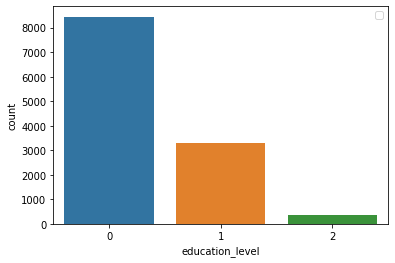

In [123]:
sns.countplot(data = df_experiment[['education_level', 'relevent_experience']], x = 'education_level')
plt.legend()
plt.show()

In [124]:
df_experiment

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,target
0,Male,1,0,0,0,3,0
1,Male,1,0,0,0,14,0
2,Male,1,0,0,0,14,0
3,Female,1,0,0,2,8,0
4,Male,1,0,0,0,6,1
...,...,...,...,...,...,...,...
14256,Male,1,1,0,0,5,0
14257,Male,0,0,0,1,15,0
14258,Male,1,0,1,0,11,0
14259,Male,1,0,0,0,20,0


In [53]:
#df_toks = [gender for gender in df_experiment['gender'] gender = 1 if gender == 'Male']

SyntaxError: invalid syntax (<ipython-input-53-b9ac289b08d4>, line 1)

In [125]:
def genderNormalizer(gender_df):
    for gender_index in gender_df.index:
        if gender_df[gender_index] == 'Male':
            gender_df[gender_index] = 1
        if gender_df[gender_index] == 'Female':
            gender_df[gender_index] = 0
        if gender_df[gender_index] == 'Other':
            gender_df[gender_index] = -1

In [126]:
genderNormalizer(df_experiment['gender'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12115 entries, 0 to 14260
Data columns (total 7 columns):
gender                 12115 non-null object
relevent_experience    12115 non-null object
enrolled_university    12115 non-null object
education_level        12115 non-null object
major_discipline       12115 non-null object
experience             12115 non-null object
target                 12115 non-null int64
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


In [56]:
df_experiment['gender'].value_counts()

 1    10884
 0     1099
-1      132
Name: gender, dtype: int64

In [145]:
feature = df_experiment.drop(columns=['target'])
label = df_experiment[['target']]

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12115 entries, 0 to 14260
Data columns (total 6 columns):
gender                 12115 non-null object
relevent_experience    12115 non-null object
enrolled_university    12115 non-null object
education_level        12115 non-null object
major_discipline       12115 non-null object
experience             12115 non-null object
dtypes: object(6)
memory usage: 982.5+ KB


In [148]:
label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12115 entries, 0 to 14260
Data columns (total 1 columns):
target    12115 non-null int64
dtypes: int64(1)
memory usage: 509.3 KB


In [152]:
X_train, X_test, y_train, y_test = train_test_split(feature, label)

In [177]:
from sklearn.svm import SVC

In [178]:
modelA = SVC()

In [179]:
modelA = modelA.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [201]:
modelA.score(X_test, y_test)

0.872565203037306

In [182]:
y_pred = modelA.predict(X_test)

In [208]:
label['target'].value_counts()

0    10582
1     1533
Name: target, dtype: int64

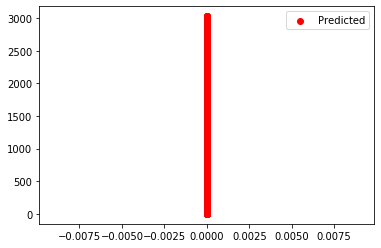

In [197]:
#plt.scatter(y_test, range(y_test.size), c='blue', label='Actual')
plt.scatter(y_pred, range(y_pred.size), c='red', label='Predicted')
plt.legend()
plt.show()

In [168]:
y_pred.sum()

0